In [ ]:
import sys
!{sys.executable} -m pip install numpy matplotlib scikit-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import sklearn

In [3]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33)

In [4]:
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
poly_svc_1 = svm.SVC(kernel='linear', C=C, random_state=0).fit(X_train, y_train)
poly_svc_3 = svm.SVC(kernel='poly', degree=3, C=C, random_state=0).fit(X_train, y_train)
print("Fitting 10...")
poly_svc_10 = svm.SVC(kernel='poly', degree=10, C=C, random_state=0).fit(X_train, y_train)
print("Done.")

Fitting 10...
Done.


In [5]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [6]:
# title for the plots
titles = ['SVM mit $k_{Kernel}=1$',
          'SVM mit $k_{Kernel}=3$',
          'SVM mit $k_{Kernel}=10$']

[1 2 2 0 2 0 1 2 2 1 2 2 1 1 0 1 2 2 2 1 0 2 1 2 0 2 2 0 2 1 0 1 0 2 1 0 0
 0 0 1 1 0 1 0 0 0 0 2 1 1]
0.8397058823529412
[1 2 2 0 2 0 2 2 2 1 2 2 1 1 0 1 2 2 2 1 0 2 1 2 0 2 2 0 2 1 0 1 0 2 1 0 0
 0 0 1 1 0 1 0 0 0 0 2 2 1]
0.8405882352941176
[1 2 1 0 1 0 1 2 2 1 1 2 1 1 0 1 2 1 1 1 0 2 1 1 0 2 1 0 2 1 0 1 0 1 1 0 0
 0 0 1 1 0 1 0 0 0 0 2 2 1]
0.7501463414634146


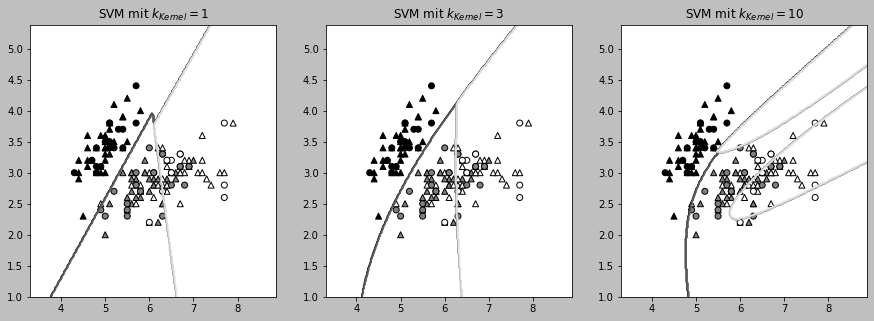

In [7]:
plt.style.use('grayscale')
f, axs = plt.subplots(1, 3, figsize=(15,5))
for i, clf in enumerate((poly_svc_1, poly_svc_3, poly_svc_10)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    axs[i].contour(xx, yy, Z)

    y_pred = clf.predict(X_test)
    print(y_pred)
    f1_score = sklearn.metrics.f1_score(y_pred, y_test, average='weighted')
    print(f1_score)

    # Plot also the training points
    axs[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='black',linewidth=1, marker='^')
    axs[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='black',linewidth=1)
    axs[i].set_title(f'{titles[i]}')

plt.savefig('over-under-fit-example.pdf', bbox_inches='tight')